In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

/tmp/ipykernel_21172/3519651323.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataFrame = pd.read_csv('onlinefoods.csv')
dataFrame

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataFrame['Gender']   = label_encoder.fit_transform(dataFrame['Gender'])
dataFrame['Marital Status'] = label_encoder.fit_transform(dataFrame['Marital Status'])
dataFrame['Occupation'] = label_encoder.fit_transform(dataFrame['Occupation'])
dataFrame['Monthly Income'] = label_encoder.fit_transform(dataFrame['Monthly Income'])
dataFrame['Educational Qualifications'] = label_encoder.fit_transform(dataFrame['Educational Qualifications'])
dataFrame['Output'] = label_encoder.fit_transform(dataFrame['Output'])
dataFrame['Feedback'] = label_encoder.fit_transform(dataFrame['Feedback'])
dataFrame['Unnamed: 12'] = label_encoder.fit_transform(dataFrame['Unnamed: 12'])

dataFrame

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,1,1,1
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,1,1
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,1,1,1
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,1,1,1


In [4]:
dataFrame = dataFrame.dropna()

In [5]:
dataFrame = dataFrame.drop_duplicates()

In [6]:
dataFrame

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,1,2,3,4,0,2,13.0012,77.5995,560046,0,1,0
363,31,1,0,0,3,1,3,12.9306,77.5434,560085,1,1,1
369,30,1,0,0,3,2,6,12.9369,77.6407,560095,1,1,1
374,21,1,2,3,4,0,3,13.0641,77.5931,560092,1,0,1


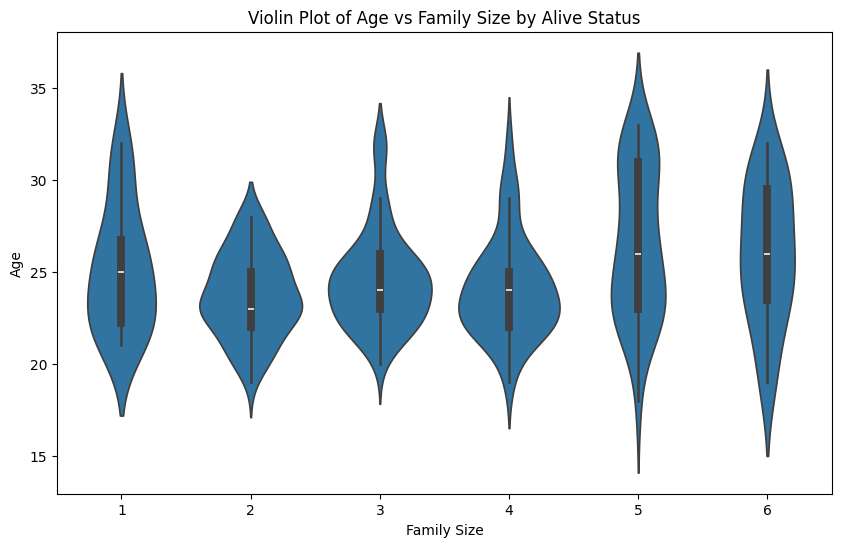

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataFrame, x="Family size", y="Age")

plt.title('Violin Plot of Age vs Family Size by Alive Status')
plt.xlabel('Family Size')
plt.ylabel('Age')

plt.show()

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = dataFrame.drop(columns=['Feedback'])
y = dataFrame['Feedback']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Feedback'] = y_resampled

print("Distribusi setelah Method SMOTE:\n", df_balanced['Feedback'].value_counts())

Distribusi setelah Method SMOTE:
 Feedback
1    231
0    231
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(columns=['Feedback']), df_balanced['Feedback'], test_size=0.2, random_state=42)

# MODEL Machine Learning Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print('*** Logistic Regression')
print("Skor Akurasi         :", lr_accuracy)



# MODEL Machine Learning Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print('\n\n*** Random Forest Classifier')
print("Skor Akurasi         :", rf_accuracy)
print('')

*** Logistic Regression
Skor Akurasi         : 0.8817204301075269


*** Random Forest Classifier
Skor Akurasi         : 0.9247311827956989



/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
